# Practical 1: Introduction to supervised learning in sklearn

This week is focussed on ensuring that you’re able to access the
teaching materials and to run Jupyter notebooks locally, as well as
describing a dataset in Python.

## Learning Outcomes

-   You have familiarised yourself with how to access the lecture notes
    and Python notebook of this module.
-   You have familiarised yourself with running the Python notebooks
    locally.
-   You have familiarised yourself with using sklearn for supervised
    learning.

# Starting the Practical

The process for every week will be the same: download the notebook to
your `DSSS` folder (or wherever you keep your course materials), switch
over to `JupyterLab` (which will be running in Podman/Docker) and get to
work.

If you want to save the completed notebook to your Github repo, you can
`add`, `commit`, and `push` the notebook in Git after you download it.
When you’re done for the day, save your changes to the file (this is
very important!), then `add`, `commit`, and `push` your work to save the
completed notebook.

> **Note**
>
> Suggestions for a Better Learning Experience:
>
> -   **Set your operating system and software language to English**:
>     this will make it easier to follow tutorials, search for solutions
>     online, and understand error messages.
>
> -   **Save all files to a cloud storage service**: use platforms like
>     Google Drive, OneDrive, Dropbox, or Git to ensure your work is
>     backed up and can be restored easily when the laptop gets stolen
>     or broken.
>
> -   **Avoid whitespace in file names and column names in datasets**

## Set up the tools

Please follow [the Setup page of
CASA0013](https://jreades.github.io/fsds/setup/) to install and
configure the computing platform, and [this
page](https://jreades.github.io/fsds/sessions/week1.html) to get started
on using the container & JupyterLab.

## Download the Notebook

So for this week, visit the [Week 1 of DSSS
page](https://huanfachen.github.io/DSSS_2025/sessions/week1.html#practical),
you’ll see that there is a ‘preview’ link and a a ‘download’ link. If
you click the `preview` link you will be taken to the GitHub page for
the notebook where it has been ‘rendered’ as a web page, which is not
editable. To make the notebook useable on *your* computer, you need to
`download` the IPYNB file.

So now:

1.  Click on the `Download` link.
2.  The file should download automatically, but *if* you see a page of
    raw code, select `File` then `Save Page As...`.
3.  Make sure you know where to find the file (e.g. Downloads or
    Desktop).
4.  Move the file to your Git repository folder
    (e.g. `~/Documents/CASA/DSSS/`)
5.  Check to see if your browser has added `.txt` to the file name:
    -   If no, then you can move to adding the file.
    -   If yes, then you can either fix the name in the Finder/Windows
        Explore, or you can do this in the Terminal using
        `mv <name_of_practical>.ipynb.txt <name_of_practical>.ipynb`
        (you can even do this in JupyterLab’s terminal if it’s already
        running).

## Running notebooks on JupyterLab

I am assuming that most of you are already running JupyterLab via Podman
(or Docker) using the command.

If you are a bit confused with *container*, *JupyterLab*, *terminal*, or
*Git*, please feel free to ask any questions.

In the following, we will introduce how to represent data and train a
regression model using sklearn.

## Load libraries

In [1]:
import sklearn
import sklearn.datasets
import sklearn.metrics
%matplotlib inline
import seaborn as sns; sns.set_theme()

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

It is important to check the version of sklearn and use this version
when you search on the online documentation or ask sklearn questions.
When reading the sklearn documentation online, please ensure that you
choose the correct version in the dropdown box on the top-right corner.

In [2]:
print(sklearn.__version__)

1.7.2


## Data Representation in Scikit-Learn

Machine learning is about creating and training models from data: for
that reason, we’ll start by discussing how data can be represented in
order to be understood by the computer. The best way to think about data
within Scikit-Learn is in terms of tables of data.

### Data as table

A basic table is a two-dimensional grid of data, in which the rows
represent individual elements of the dataset, and the columns represent
quantities related to each of these elements.

Here, we will use the [Iris
dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which was
created by Ronald Fisher in 1936 and is a classic multi-class
classification dataset. Below is a picture showing the flower structure
([source](https://byjus.com/biology/sepals/)):

![](https://cdn1.byjus.com/wp-content/uploads/2020/10/structure-of-a-flower.png)

The **sklearn.datasets** module includes utilities to load datasets,
including methods to load and fetch popular reference datasets. It
provides a list of classic datasets, including *iris*.

There are a few parameters in the funciton of load_iris. If *return_X_y*
is set as False (by default), then it returns a Bunch object consisting
of x and y variables. Otherwise, it returns *(data, target)* (aka, x and
y objects) separately. If *as_frame* is True, the returned data is a
pandas DataFrame.

In [3]:
iris = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
print(iris.__class__)

<class 'tuple'>


The *iris* object is a tuple that consists of two DataFrames, namely
features (or X_iris) and target (or y_iris).

We will separate these two DataFrames and rename the columns.

In [4]:
# features DataFrame called X_iris
X_iris = iris[0]
X_iris = X_iris.rename(columns={"sepal length (cm)": "sepal_length", 
"sepal width (cm)": "sepal_width", 
"petal length (cm)": "petal_length",
"petal width (cm)": "petal_width"
})
# target DataFrame called y_iris
y_iris = iris[1]

Explore the *features* DataFrame.

Here, each row of the data refers to a single observed flower, and the
number of rows is the total number of flowers in the dataset. In
general, we will refer to the rows of the matrix as samples, and the
number of rows as **n_samples**. Each column of the data refers to a
particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as features, and
the number of columns as **n_features**.

In [5]:
print(X_iris.__class__)
print("Number of samples:{}".format(X_iris.shape[0]))
print("Number of features:{}".format(X_iris.shape[1]))
print(X_iris.head())

<class 'pandas.core.frame.DataFrame'>
Number of samples:150
Number of features:4
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Explore the *target* DataFrame.

In [6]:
print(y_iris.__class__)
print(y_iris.head())

<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Below are some reflections on Features and Target.

#### Features matrix

This table layout makes clear that the information can be thought of as
a two-dimensional numerical array or matrix, which we will call the
*features matrix*. By convention, this features matrix is often stored
in a variable named `X`. The features matrix is assumed to be
two-dimensional, with shape `[n_samples, n_features]`, and is most often
contained in a NumPy array or a Pandas `DataFrame`, though some
Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects
described by the dataset. For example, the sample might be a flower, a
person, a document, an image, a sound file, a video, an astronomical
object, or anything else you can describe with a set of quantitative
measurements.

The columns can be ofd different types, including real-value, string,
dates, etc.

#### Target array

In addition to the feature matrix `X`, we also generally work with a
*label* or *target* array, which by convention we will usually call `y`.
The target array is usually one dimensional, with length `n_samples`,
and is generally contained in a NumPy array or Pandas `Series`. The
target array may have continuous numerical values, or discrete
classes/labels. While some Scikit-Learn estimators do handle multiple
target values in the form of a two-dimensional, `[n_samples, n_targets]`
target array, we will primarily be working with the common case of a
one-dimensional target array.

Often one point of confusion is how the target array differs from the
other features columns. The distinguishing feature of the target array
is that it is usually the quantity we want to *predict from the data*:
in statistical terms, it is the dependent variable. For example, in the
preceding data we may wish to construct a model that can predict the
species of flower based on the other measurements; in this case, the
`species` column would be considered the target array.

We can use Seaborn to conveniently visualise the data:

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


/opt/conda/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


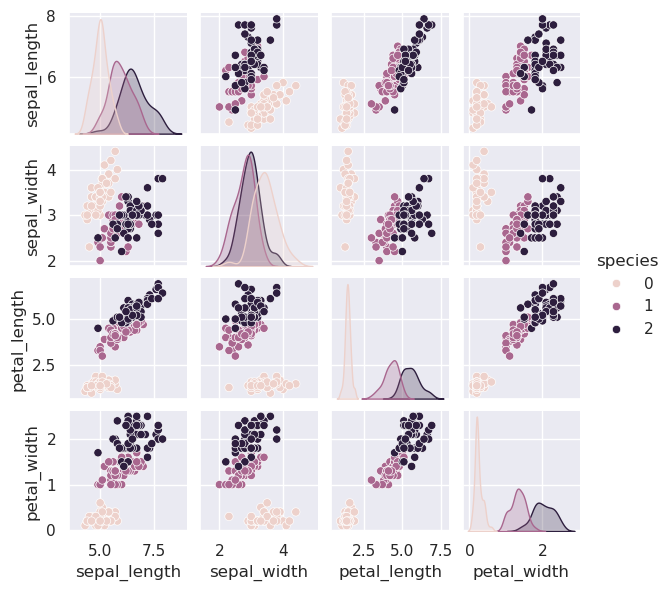

In [7]:
# will combine X and y into a DataFrame before plotting
iris_Xy = X_iris.assign(species = y_iris)
print(iris_Xy.columns)
sns.pairplot(iris_Xy, hue='species', size=1.5)

#### Extra data manipulation

In some projects, you might be given a single DataFrame that combines X
and y instead of two separate DataFrame. Then you can use *pandas*
operations to separate X and y. For example:

In [8]:
X_iris = iris_Xy.drop('species', axis=1)
X_iris.shape

(150, 4)

In [9]:
y_iris = iris_Xy['species']
y_iris.shape

(150,)

To summarise, the expected layout of features and target values is
visualised in the following diagram:

<figure>
<img
src="https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.02-samples-features.png"
alt="Figure" />
<figcaption aria-hidden="true">Figure</figcaption>
</figure>

With this data properly formatted, we can move on to consider the
*estimator* API of Scikit-Learn:

## Scikit-Learn’s Estimator API

The Scikit-Learn API is designed with the following guiding principles
in mind, as outlined in the [Scikit-Learn API
paper](http://arxiv.org/abs/1309.0238):

-   *Consistency*: All objects share a common interface drawn from a
    limited set of methods, with consistent documentation.

-   *Inspection*: All specified parameter values are exposed as public
    attributes.

-   *Limited object hierarchy*: Only algorithms are represented by
    Python classes; datasets are represented in standard formats (NumPy
    arrays, Pandas `DataFrame`s, SciPy sparse matrices) and parameter
    names use standard Python strings.

-   *Composition*: Many machine learning tasks can be expressed as
    sequences of more fundamental algorithms, and Scikit-Learn makes use
    of this wherever possible.

-   *Sensible defaults*: When models require user-specified parameters,
    the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once
the basic principles are understood. Every machine learning algorithm in
Scikit-Learn is implemented via the Estimator API, which provides a
consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as
follows (we will step through a handful of detailed examples in the
sections that follow).

1.  Choose a class of model by importing the appropriate estimator class
    from Scikit-Learn.
2.  Choose model hyperparameters by instantiating this class with
    desired values.
3.  Arrange data into a features matrix and target vector following the
    discussion above.
4.  Fit the model to your data by calling the `fit()` method of the
    model instance.
5.  Apply the Model to new data:
    -   For supervised learning, often we predict labels for unknown
        data using the `predict()` method.
    -   For unsupervised learning, we often transform or infer
        properties of the data using the `transform()` or `predict()`
        method.

We will now step through several simple examples of applying supervised
and unsupervised learning methods.

### Supervised learning example: Simple linear regression

As an example of this process, let’s consider a simple linear
regression—that is, the common case of fitting a line to $(x, y)$ data.

We want to explore the relationship between Sepal length and Petal
length.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

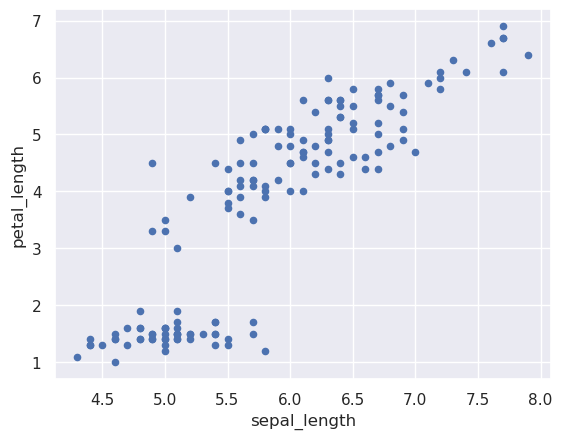

In [8]:
X_iris.plot.scatter(x='sepal_length',y='petal_length')

For convenience, we will use *x* and *y* to store these two variables.

In [9]:
x = X_iris.sepal_length
y = X_iris.petal_length

With this data in place, we can use the recipe outlined earlier. Let’s
walk through the process:

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
If we would like to compute a simple linear regression model, we can
import the linear regression class:

    from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you
can read more about them in the [`sklearn.linear_model` module
documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an
instance of a model*.

Once we have decided on our model class, there are still some options
open to us. Depending on the model class we are working with, we might
need to answer one or more questions like the following:

-   Would we like to fit for the offset (i.e., *y*-intercept)?
-   Would we like the model to be normalized?
-   Would we like to preprocess our features to add model flexibility?
-   What degree of regularization would we like to use in our model?
-   How many model components would we like to use?

These are examples of the important choices that must be made *once the
model class is selected*. These choices are often represented as
*hyperparameters*, or parameters that must be set before the model is
fit to data. In Scikit-Learn, hyperparameters are chosen by passing
values at model instantiation. We will explore how you can motivate and
justify the choice of hyperparameters in the later weeks.

For our linear regression example, we can instantiate the
`LinearRegression` class and specify that we would like to fit the
intercept using the `fit_intercept` hyperparameter:

In [10]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Keep in mind that when the model is instantiated, the only action is the
storing of these hyperparameter values. In particular, we have not yet
applied the model to any data: the Scikit-Learn API makes very clear the
distinction between *choice of model* and *application of model to
data*.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which
requires a two-dimensional features matrix and a one-dimensional target
array. Here our target variable `y` is already in the correct form (a
length-`n_samples` array), but we need to massage the data `x` to make
it a matrix of size `[n_samples, n_features]`. In this case, this
amounts to a simple reshaping of the one-dimensional array:

In [11]:
print("Shape of the original x object: {}".format(x.shape))
X = x.to_numpy()[:, np.newaxis]
print("Shape of the X object: {}".format(X.shape))

Shape of the original x object: (150,)
Shape of the X object: (150, 1)


The difference between two shapes, **(150,)** and **(150,1)** is
noteworthy, as it has caused many problems when I used sklearn.

What is *np.newaxis*? Simply put, it is used to increase the dimension
of the existing array by one more dimension, when used once.

![](https://i.stack.imgur.com/zkMBy.png)

#### 4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the
`fit()` method of the model:

In [12]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


This `fit()` command causes a number of model-dependent internal
computations to take place, and the results of these computations are
stored in model-specific attributes that the user can explore.

In Scikit-Learn, by convention all model parameters that were learned
during the `fit()` process have trailing underscores; for example in
this linear model, we have the following:

In [13]:
print("Coef: {}".format(model.coef_))
print("Slope: {}".format(model.intercept_))
print("Formula: petal_length = {} * sepal_length + {}".format(np.round(model.coef_[0],2), np.round(model.intercept_, 2)))

Coef: [1.85843298]
Slope: -7.1014433696024515
Formula: petal_length = 1.86 * sepal_length + -7.1


To get the goodness-of-fit or R square of this model, use the
*sklearn.metrics* module.

In [14]:
y_pred = model.predict(X)
print("The R^2 of this model is: {}".format(sklearn.metrics.r2_score(y, y_pred)))

The R^2 of this model is: 0.759954645772515


Another question that frequently comes up regards the *uncertainty* or
*standard deviation* in such internal model parameters.

In general, Scikit-Learn does not provide tools to easily draw
conclusions from internal model parameters themselves: interpreting
model parameters is much more a *statistical modeling* question than a
*machine learning* question. Machine learning rather focuses on what the
model *predicts*.

If you would like to build a linear regression model that estimates the
uncertainty of model parameters, you can have a look at [Statsmodels
package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning
is to evaluate it based on what it says about new data that was not part
of the training set.

In Scikit-Learn, this can be done using the `predict()` method. For the
sake of this example, our “new data” will be a grid of *x* values, and
we will ask what *y* values the model predicts:

In [15]:
# the xfit is a list of x values between 4.5 and 8.0, with step length of 0.5
xfit = np.arange(4.5, 8, 0.5)

As before, we need to coerce these *x* values into a
`[n_samples, n_features]` features matrix, after which we can feed it to
the model:

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let’s visualize the results by plotting first the raw data, and
then this model fit:

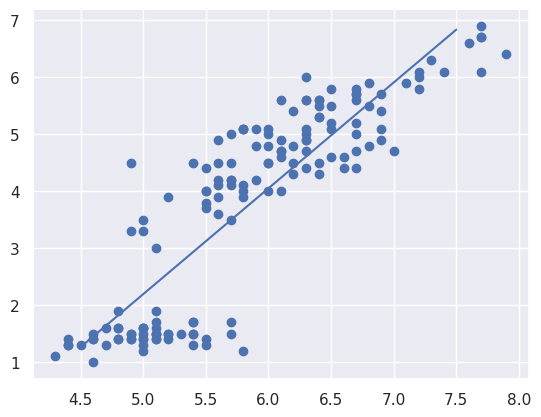

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## You’re Done!

In this session, we have covered the essential features of the sklearn
data representation, and the estimator API.

Regardless of the type of estimator, the same *import -\> instantiate
-\> fit -\> predict* workflow holds.

Armed with this information about the estimator API, you can explore the
Scikit-Learn documentation and begin trying out various models on your
data.

## References and recommendations:

1.  The introduction to sklearn is heavily based on [this
    notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb),
    which is part of the [online
    repo](https://jakevdp.github.io/PythonDataScienceHandbook/) of the
    book [“Python Data Science
    Handbook”](https://www.oreilly.com/library/view/python-data-science/9781491912126/).

2.  If you want to learn a bit more about sklearn, see [Introduction to
    Machine Learning with
    Scikit-Learn](https://www.slideshare.net/BenjaminBengfort/introduction-to-machine-learning-with-scikitlearn).